# Credit Card Routing for Online Purchase via Predictive Modelling

# Problem Statement


### Case Description
On your first day as a data scientist at one of the world’s largest retail companies, you are invited to a meeting with important business stakeholders from the online payment department. Over the past year, they have encountered a high failure rate of online credit card payments. The company incurs significant losses due to failed transactions, and customers are becoming increasingly unsatisfied with the online shop.

Online credit card payments are performed via so-called payment service providers (PSPs). Your company has contracts with four different PSPs and pays transaction fees for every single payment. The current routing logic is manual and rule-based. However, business decision-makers hope that with predictive modelling and your help, a smarter way of routing a PSP to a transaction is possible.

### Project Aim
The goal is to help the business automate the credit card routing via a predictive model. This model should increase the payment success rate by finding the best possible PSP for each transaction while keeping the transaction fees low.

### Data Set
The data set and all relevant information from the business side (name of PSPs, transaction fees) are given in a separate *.zip folder, which is available in myCampus, under the section Case Study.

### Task Description
The task consists of both coding and conceptual steps. Here is a list of tasks, which should be included in your final document:


1. **Project Structure**: Structure the project via the CRISP-DM or Team DS methodologies and give a recommendation of how a git repository for the project could look like. Note that you do not have to structure your final code according to your git-repository proposal.


2. **Data Quality Assessment**: Assess the quality of the provided data set. Prepare and visualize your findings of the initial data analysis in order that business stakeholders can understand them in a clear and easy way.


3. **Model Development**: Provide a baseline model as well as an accurate predictive model, which fulfills business requirements, i.e., increase credit card success rate and keep fees low.


4. **Model Interpretation**: In order that the business places confidence in your model, discuss the importance of the individual features and make the results of the model interpretable. Moreover, a sophisticated error analysis is very important for the business to understand the drawbacks of your approach.


5. **Model Deployment**: In the last step of the project, give a proposal of how your model could be used by the business in everyday work, for instance, via a graphical user interface (GUI).


In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# 2. Data Understanding:

In [2]:
# Read the Excel file into a data frame

df = pd.read_excel("PSP_Jan_Feb_2019.xlsx", index_col=0)

In [3]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [4]:
# Check the shape, columns, and data types of the data frame

print(df.shape)

(50410, 7)


In [5]:
print(df.columns)
print(df.dtypes)

Index(['tmsp', 'country', 'amount', 'success', 'PSP', '3D_secured', 'card'], dtype='object')
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


In [6]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [7]:
# Get some basic statistics of the numerical columns
df.describe()

,tmsp,amount,success,3D_secured
count,50410,50410.000000,50410.000000,50410.000000
mean,2019-01-29 16:28:52.923269120,202.395715,0.202896,0.238266
min,2019-01-01 00:01:11,6.000000,0.000000,0.000000
25%,2019-01-14 12:00:36.249999872,133.000000,0.000000,0.000000
50%,2019-01-30 15:20:07.500000,201.000000,0.000000,0.000000
75%,2019-02-13 01:09:50.500000,269.000000,0.000000,0.000000
max,2019-02-28 23:48:19,630.000000,1.000000,1.000000
std,NaN,96.274730,0.402160,0.426027


In [8]:
# Count the number of Nan values in each column
print(df.isnull().sum())

tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


In [9]:
for col in ['country','success', 'PSP', '3D_secured', 'card']:
    unique_values = df[col].unique()
    print(f"Unique values in column {col}: {unique_values}")

Unique values in column country: ['Germany' 'Austria' 'Switzerland']
Unique values in column success: [0 1]
Unique values in column PSP: ['UK_Card' 'Simplecard' 'Moneycard' 'Goldcard']
Unique values in column 3D_secured: [0 1]
Unique values in column card: ['Visa' 'Diners' 'Master']


# 3. Data Preparation

In [10]:
print("Duplicate count: ",df[df.duplicated()].shape[0])

Duplicate count:  81


In [11]:
df.shape

(50410, 7)

In [12]:
# Removing the duplicate records from the dataset
df.drop_duplicates(inplace=True)
print("Record count after removing duplicates: ", df.shape[0])

Record count after removing duplicates:  50329


In [13]:
#Loading the PSP transaction fees data as a dataFrame
df1 = pd.DataFrame({"PSP":["Moneycard","Goldcard","UK_Card","Simplecard"], 
                    "success_txnFee":[5,10,3,1],
                    "failure_txnFee":[2,5,1,0.5]
                   })
display(df1.head())

,PSP,success_txnFee,failure_txnFee
0,Moneycard,5,2.0
1,Goldcard,10,5.0
2,UK_Card,3,1.0
3,Simplecard,1,0.5


In [14]:
#Merging both the dataframes into a single dataframe based on the PSP to map the transaction fee
df2 = pd.merge(df, df1, on = "PSP")

In [15]:
df2.head()

,tmsp,country,amount,success,PSP,3D_secured,card,success_txnFee,failure_txnFee
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,3,1.0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3,1.0
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,3,1.0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3,1.0
4,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master,3,1.0


In [16]:
# Sorting the dataframe by the timestamp in ascending order
df2 = df2.sort_values(by="tmsp")

# Finding the difference between consecutive timestamps and converting it into seconds
df2["tmsp_diff"] = (df2["tmsp"].diff().dt.total_seconds())

# Resetting the index
df2.reset_index(drop=True, inplace=True)

# Assigning a value 1 if the transaction is done within a minute after the previous transaction, or 0 otherwise
df2["withinMinute"] = df2["tmsp_diff"].apply(lambda x: 1 if x <= 60 else 0)

# Introducing a feature ‘noOfAttempts’ which captures the number of transaction attempts based on the given criteria and assigning an initial value of 1 for all records
df2["noOfAttempts"] = 1

# Incrementing the 'noOfAttempts' consequently if withinMinute = 1
df2.loc[(df2["country"].eq(df2["country"].shift()) & df2["amount"].eq(df2["amount"].shift()) & df2["withinMinute"].shift().le(60)), "noOfAttempts"] = df2["noOfAttempts"].shift() + 1


In [17]:
df2.head()

,tmsp,country,amount,success,PSP,3D_secured,card,success_txnFee,failure_txnFee,tmsp_diff,withinMinute,noOfAttempts
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,3,1.0,NaN,0,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3,1.0,6.0,1,2
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,3,1.0,92.0,0,1
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3,1.0,24.0,1,2
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,0.5,80.0,0,1


In [18]:
# Extract Month, Day, Hour from 'tmsp' column
df2['Month'] = df2['tmsp'].dt.month
df2['Day'] = df2['tmsp'].dt.day
df2['Hour'] = df2['tmsp'].dt.hour

# Map numeric day of week to weekday name
df2['Weekday'] = df2['tmsp'].dt.day_name()

# Display the first few rows of the dataframe
print(df2.head())


                 tmsp  country  amount  success         PSP  3D_secured  \
0 2019-01-01 00:01:11  Germany      89        0     UK_Card           0   
1 2019-01-01 00:01:17  Germany      89        1     UK_Card           0   
2 2019-01-01 00:02:49  Germany     238        0     UK_Card           1   
3 2019-01-01 00:03:13  Germany     238        1     UK_Card           1   
4 2019-01-01 00:04:33  Austria     124        0  Simplecard           0   

     card  success_txnFee  failure_txnFee  tmsp_diff  withinMinute  \
0    Visa               3             1.0        NaN             0   
1    Visa               3             1.0        6.0             1   
2  Diners               3             1.0       92.0             0   
3  Diners               3             1.0       24.0             1   
4  Diners               1             0.5       80.0             0   

   noOfAttempts  Month  Day  Hour  Weekday  
0             1      1    1     0  Tuesday  
1             2      1    1     0  Tue

In [19]:
# Fill NaN values in 'tmsp_diff' column with 0 and drop 'tmsp_diff' and 'withinMinute' columns
df2["tmsp_diff"].fillna(0, inplace=True)
df2.drop(columns=['tmsp_diff', 'withinMinute'], inplace=True)

# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
psp_df = df2.copy()
categorical_cols = ["country","PSP", "card","Weekday"]
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns and print the classes
for col in categorical_cols:
    psp_df[col] = label_encoder.fit_transform(psp_df[col])
    print(f'{col}: {label_encoder.classes_}')

# Display a random sample of 5 rows from the dataframe
print(psp_df.sample(5))


country: ['Austria' 'Germany' 'Switzerland']
PSP: ['Goldcard' 'Moneycard' 'Simplecard' 'UK_Card']
card: ['Diners' 'Master' 'Visa']
Weekday: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
                     tmsp  country  amount  success  PSP  3D_secured  card  \
1239  2019-01-01 23:33:25        2      42        0    3           0     2   
47076 2019-02-25 03:18:08        1     296        0    3           0     1   
31990 2019-02-06 11:57:10        0     346        0    3           1     2   
33769 2019-02-08 06:56:39        1     101        0    3           1     1   
45317 2019-02-22 12:42:47        0     168        0    2           1     1   

       success_txnFee  failure_txnFee  noOfAttempts  Month  Day  Hour  Weekday  
1239                3             1.0             2      1    1    23        5  
47076               3             1.0             2      2   25     3        1  
31990               3             1.0             1      2    6    11      

In [20]:
# ONE-HOT ENCODING
df4 = df2.copy()

# Using drop_first=True to drop the redundant column
categorical_cols = ["country", "PSP", "card", "Weekday"]
df4 = pd.get_dummies(df4, columns=categorical_cols, drop_first=True)

# Display the shape and the first few rows of the resulting DataFrame
print(f'Shape of DataFrame: {df4.shape}')
df4.head()


Shape of DataFrame: (50329, 23)


,tmsp,amount,success,3D_secured,success_txnFee,failure_txnFee,noOfAttempts,Month,Day,Hour,...,PSP_Simplecard,PSP_UK_Card,card_Master,card_Visa,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,2019-01-01 00:01:11,89,0,0,3,1.0,1,1,1,0,...,False,True,False,True,False,False,False,False,True,False
1,2019-01-01 00:01:17,89,1,0,3,1.0,2,1,1,0,...,False,True,False,True,False,False,False,False,True,False
2,2019-01-01 00:02:49,238,0,1,3,1.0,1,1,1,0,...,False,True,False,False,False,False,False,False,True,False
3,2019-01-01 00:03:13,238,1,1,3,1.0,2,1,1,0,...,False,True,False,False,False,False,False,False,True,False
4,2019-01-01 00:04:33,124,0,0,1,0.5,1,1,1,0,...,True,False,False,False,False,False,False,False,True,False


# 3.1 Data vizualization

In [21]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots

,PSP,psp_success_rate
0,Goldcard,0.406172
1,Moneycard,0.218833
2,Simplecard,0.158212
3,UK_Card,0.194861


,card,card_success_rate
0,Diners,0.223247
1,Master,0.194252
2,Visa,0.208756


,country,country_success_rate
0,Austria,0.204969
1,Germany,0.201696
2,Switzerland,0.206025


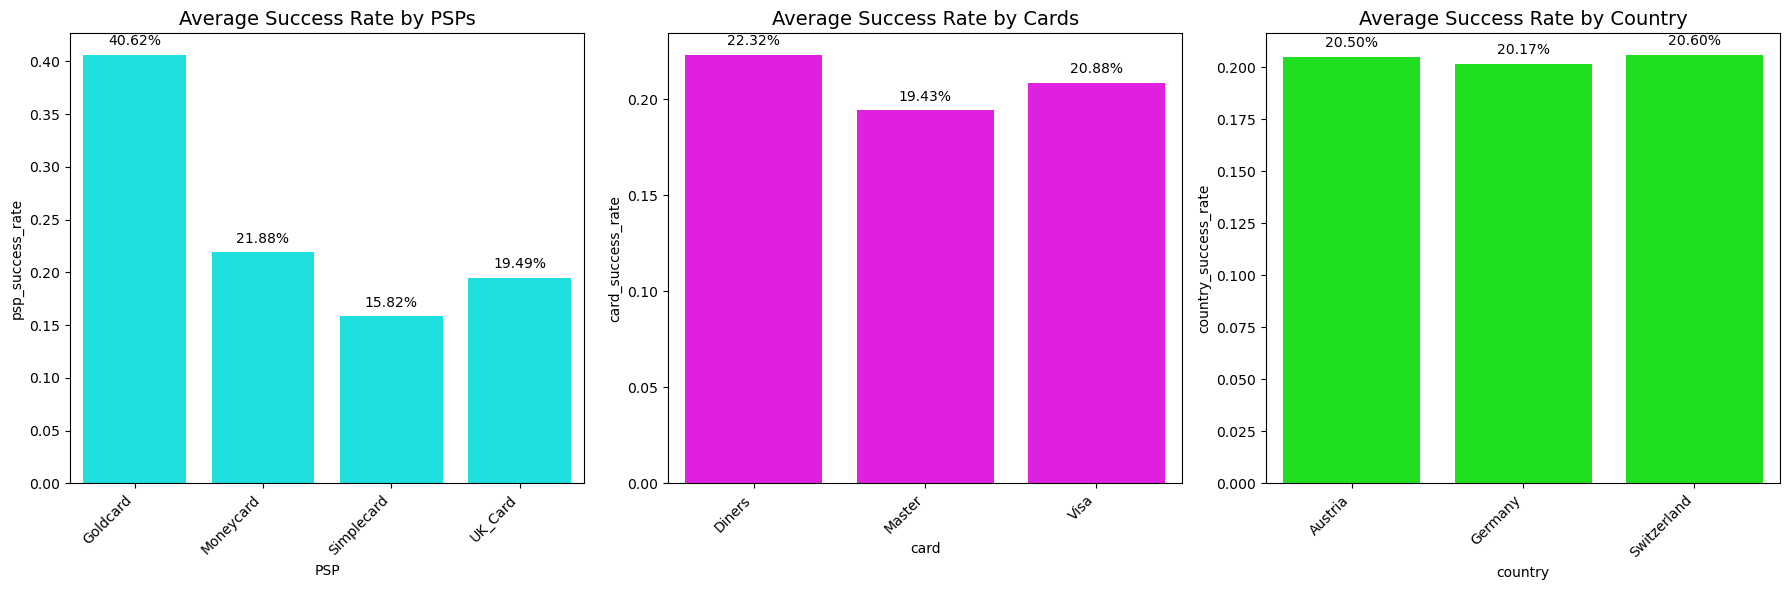

In [22]:
# Calculating Avg success rates
df2["psp_success_rate"] = df2.groupby('PSP')['success'].transform('mean')
df2["card_success_rate"] = df2.groupby('card')['success'].transform('mean')
df2["country_success_rate"] = df2.groupby('country')['success'].transform('mean')

# Creating tables for PSPs, cards, countries and their success rates
rates = df2[["PSP","card","country","psp_success_rate","card_success_rate","country_success_rate"]]
psp_success_rate_df = rates.groupby("PSP")["psp_success_rate"].mean().reset_index()
card_success_rate_df = rates.groupby("card")["card_success_rate"].mean().reset_index()
country_success_rate_df = rates.groupby("country")["country_success_rate"].mean().reset_index()

# Display the resulting DataFrames
display(psp_success_rate_df)
display(card_success_rate_df)
display(country_success_rate_df)

# Plotting the success rates
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='PSP', y='psp_success_rate', data=psp_success_rate_df, ax=axs[0], color='cyan')
axs[0].set_title('Average Success Rate by PSPs', fontsize=14)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, horizontalalignment='right')
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sns.barplot(x='card', y='card_success_rate', data=card_success_rate_df, ax=axs[1], color='magenta')
axs[1].set_title('Average Success Rate by Cards', fontsize=14)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right')
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sns.barplot(x='country', y='country_success_rate', data=country_success_rate_df, ax=axs[2], color='lime')
axs[2].set_title('Average Success Rate by Country', fontsize=14)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, horizontalalignment='right')
for p in axs[2].patches:
    axs[2].annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.show()


Success Rate by PSPs:

- This plot illustrates the average success rate for each Payment Service Provider (PSP). It helps in comparing the performance of different PSPs in terms of successfully processed transactions. It shows that Goldcard has the highest success rate of 40.62% and simplecard has the lowest success rate of 15.82%.

Success Rate by Cards:

- This plot shows the average success rate for each card type used in transactions. It provides insights into whether certain card types have higher success rates compared to others. It shows that Diners has the highest success rate of 22.32% and lowest success rate of 19.43%.

Success Rate by Country:

- This plot displays the average success rate for each country where transactions originate. It helps in understanding whether success rates vary significantly across different countries. It shows that switzerland has the highest success rate of 20.60% and Germany has the lowest success rate of 20.17%.

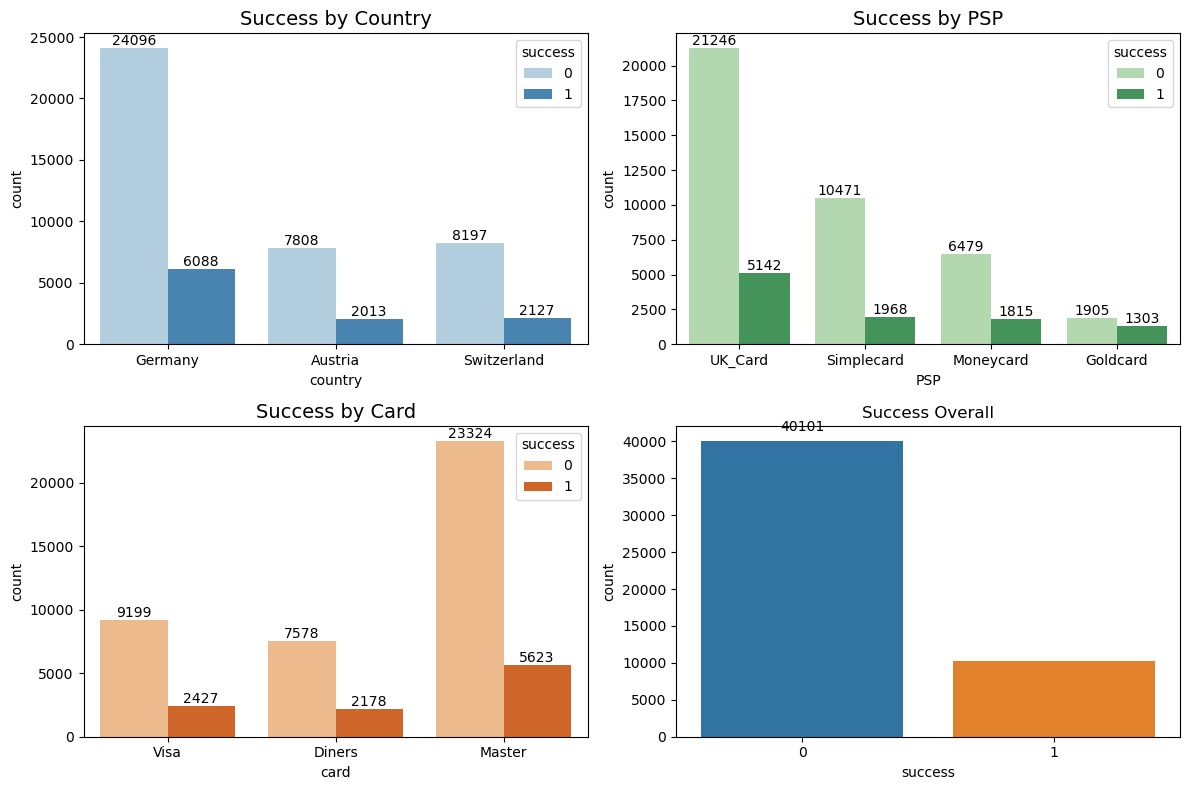

In [23]:
# Set the figure size
fig, axs = plt.subplots(2, 2, figsize=(12,8))

# Success by Country
sns.countplot(data=df, x="country", hue="success", ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title("Success by Country", fontsize=14)
axs[0, 0].bar_label(axs[0, 0].containers[0])
axs[0, 0].bar_label(axs[0, 0].containers[1])

# Success by PSP
sns.countplot(data=df, x="PSP", hue="success", ax=axs[0, 1], palette='Greens')
axs[0, 1].set_title("Success by PSP", fontsize=14)
axs[0, 1].bar_label(axs[0, 1].containers[0])
axs[0, 1].bar_label(axs[0, 1].containers[1])

# Success by Card
sns.countplot(data=df, x="card", hue="success", ax=axs[1, 0], palette='Oranges')
axs[1, 0].set_title("Success by Card", fontsize=14)
axs[1, 0].bar_label(axs[1, 0].containers[0])
axs[1, 0].bar_label(axs[1, 0].containers[1])

# Success Overall
plt.subplot(2,2,4)
ax4 = sns.countplot(data=df, x="success")
plt.title("Success Overall")
for i, p in enumerate(ax4.patches):
    if i < len(ax4.containers):
        ax4.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Adjust layout
plt.tight_layout()
plt.show()


Success by Country:

- This subplot shows the distribution of success (represented by hue) across different countries. It helps visualize whether success rates vary significantly between different countries.

Success by PSP (Payment Service Provider):

- This subplot displays the distribution of success (represented by hue) across different payment service providers. It helps analyze whether certain PSPs have higher success rates compared to others.

Success by Card:

- This subplot illustrates the distribution of success (represented by hue) across different card types. It provides insights into whether success rates differ based on the type of card used.

Success Overall:

- This subplot shows the overall distribution of success across the dataset. It provides a general overview of the success distribution without considering any specific categorical variable.

,success,TransactionCount
0,0,21639
1,1,5653


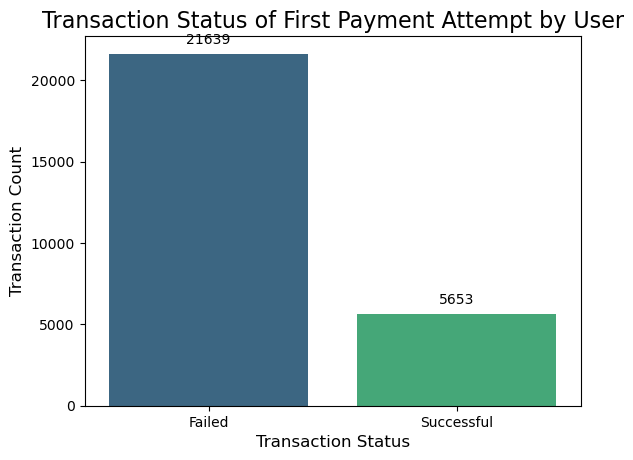

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the first payment attempt
first_attempt_df = df2[df2["noOfAttempts"]==1]["success"].value_counts().rename_axis('success').reset_index(name='TransactionCount')

# Display the DataFrame
display(first_attempt_df)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a count plot with a different color
sns.barplot(x='success', y='TransactionCount', data=first_attempt_df, ax=ax, palette='viridis')

# Set the title of the current axes with a larger font size
ax.set_title('Transaction Status of First Payment Attempt by User', fontsize=16)

# Set the x and y-axis labels with a larger font size
ax.set_xlabel('Transaction Status', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)

# Update x-axis tick labels using dictionary
labels = {0: 'Failed', 1: 'Successful'}
ax.set_xticklabels([labels[x] for x in first_attempt_df['success']])

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Display the figure
plt.show()


,card,PSP,Transaction Type,Total Fee
16,Master,Goldcard,failure_txnFee,8815.0
20,Visa,Goldcard,failure_txnFee,3875.0
6,Master,Simplecard,success_txnFee,7241.0
13,Diners,Moneycard,failure_txnFee,3330.0
8,Visa,Goldcard,success_txnFee,7750.0


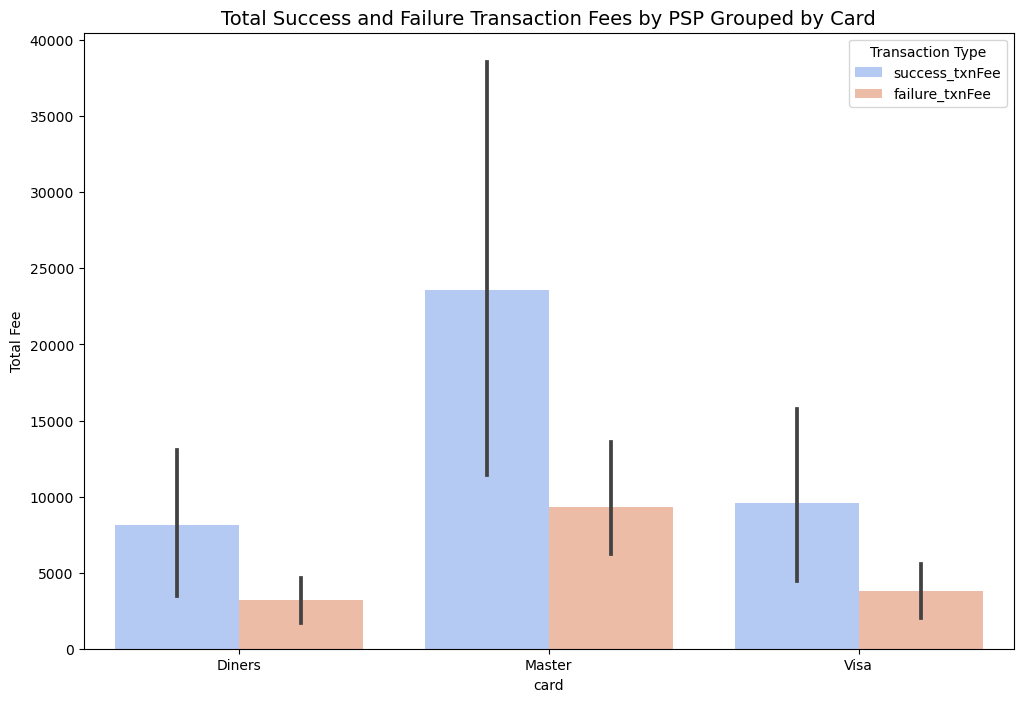

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'card' and 'PSP', and calculate the sum of 'success_txnFee' and 'failure_txnFee'
card_PSP = df2.groupby(["card","PSP"], as_index=False).agg({"success_txnFee": "sum", "failure_txnFee": "sum"})

# Melt the DataFrame to have 'Transaction Type' and 'Total Fee' columns
fee_summary = card_PSP.melt(id_vars=['card', 'PSP'], value_vars=['success_txnFee', 'failure_txnFee'],
                            var_name='Transaction Type', value_name='Total Fee')

# Display a sample of the DataFrame
display(fee_summary.sample(5))

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12,8))

# Create a grouped bar plot for total success and failure transaction fees by PSP grouped by Card
sns.barplot(x='card', y='Total Fee', hue='Transaction Type', data=fee_summary, ax=ax, palette='coolwarm')

# Set the title of the current axes
ax.set_title('Total Success and Failure Transaction Fees by PSP Grouped by Card', fontsize=14)

# Display the figure
plt.show()


It groups the dataframe df2 by the columns 'card' and 'PSP'. It calculates the sum of 'success_txnFee' and 'failure_txnFee' for each group.

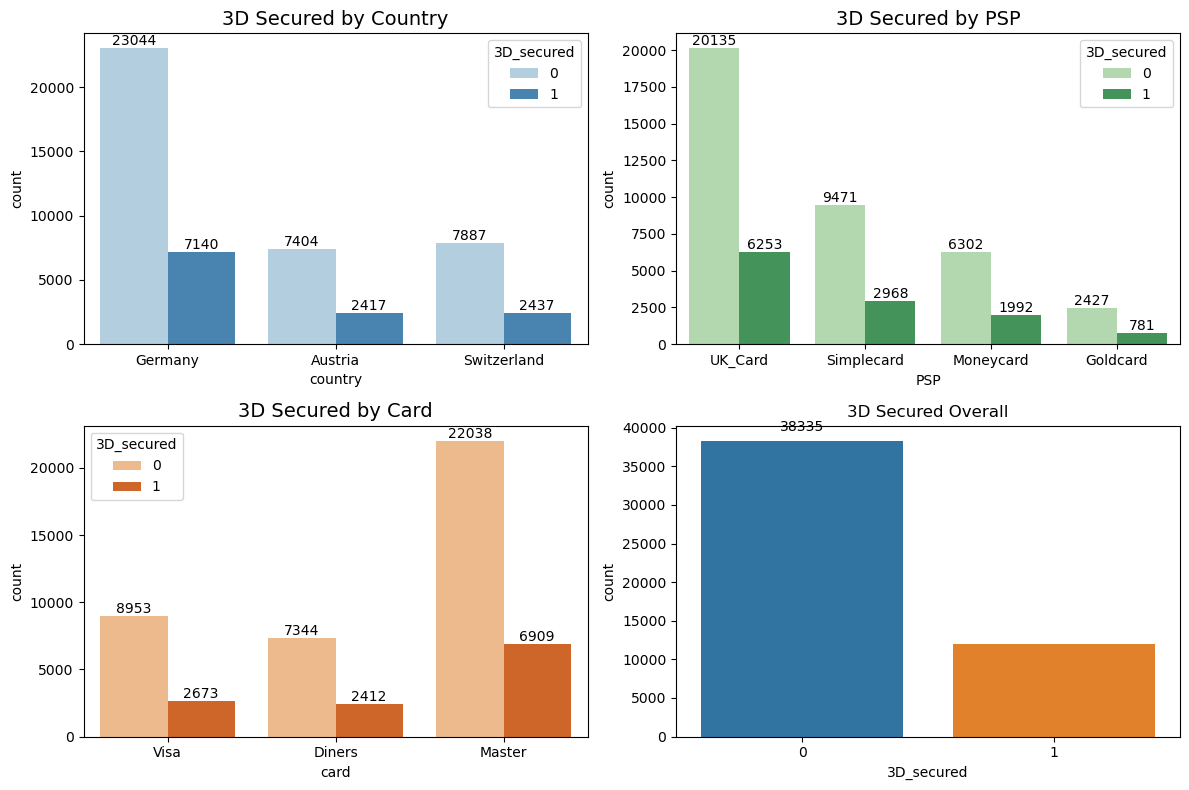

In [26]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(12,8))

# 3D Secured by Country
sns.countplot(data=df, x="country", hue="3D_secured", ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title("3D Secured by Country", fontsize=14)
axs[0, 0].bar_label(axs[0, 0].containers[0])
axs[0, 0].bar_label(axs[0, 0].containers[1])

# 3D Secured by PSP
sns.countplot(data=df, x="PSP", hue="3D_secured", ax=axs[0, 1], palette='Greens')
axs[0, 1].set_title("3D Secured by PSP", fontsize=14)
axs[0, 1].bar_label(axs[0, 1].containers[0])
axs[0, 1].bar_label(axs[0, 1].containers[1])

# 3D Secured by Card
sns.countplot(data=df, x="card", hue="3D_secured", ax=axs[1, 0], palette='Oranges')
axs[1, 0].set_title("3D Secured by Card", fontsize=14)
axs[1, 0].bar_label(axs[1, 0].containers[0])
axs[1, 0].bar_label(axs[1, 0].containers[1])

# 3D Secured Overall
plt.subplot(2,2,4)
ax4 = sns.countplot(data=df, x="3D_secured")
plt.title("3D Secured Overall")
for i, p in enumerate(ax4.patches):
    if i < len(ax4.containers):
        ax4.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# Adjust layout
plt.tight_layout()
plt.show()


3D Secured by Country:
- This subplot shows the distribution of transactions marked as 3D secured (represented by hue) across different countries. It helps visualize whether 3D secure transactions are more prevalent in certain countries.

3D Secured by PSP (Payment Service Provider):
- This subplot displays the distribution of 3D secured transactions (represented by hue) across different payment service providers. It helps analyze whether certain PSPs have a higher proportion of 3D secured transactions compared to others.

3D Secured by Card:
- This subplot illustrates the distribution of 3D secured transactions (represented by hue) across different card types. It provides insights into whether 3D secure transactions are more common with specific card types.

3D Secured Overall:
- This subplot shows the overall distribution of 3D secured transactions across the dataset. It provides a general overview of the prevalence of 3D secured transactions without considering any specific categorical variable.

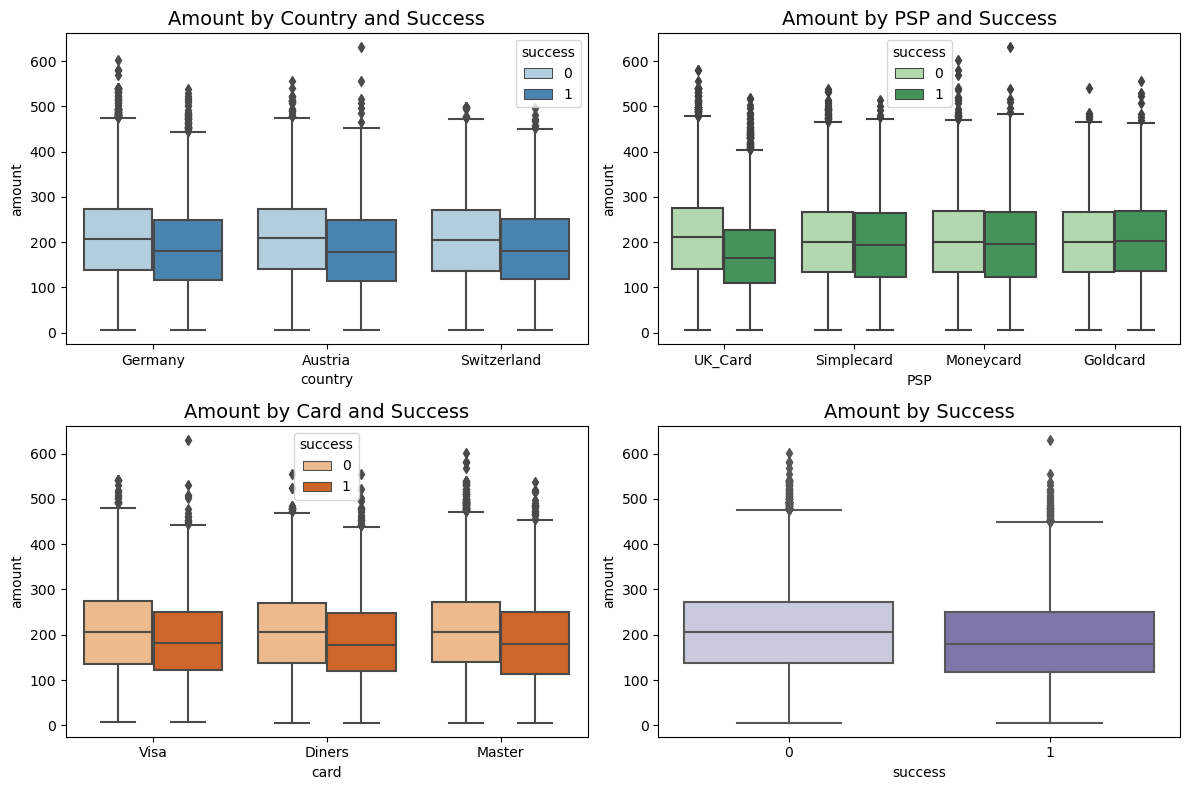

In [27]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(12,8))

# Amount by Country and Success
sns.boxplot(data=df, x="country", y="amount", hue="success", ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title("Amount by Country and Success", fontsize=14)

# Amount by PSP and Success
sns.boxplot(data=df, x="PSP", y="amount", hue="success", ax=axs[0, 1], palette='Greens')
axs[0, 1].set_title("Amount by PSP and Success", fontsize=14)

# Amount by Card and Success
sns.boxplot(data=df, x="card", y="amount", hue="success", ax=axs[1, 0], palette='Oranges')
axs[1, 0].set_title("Amount by Card and Success", fontsize=14)

# Amount by Success
sns.boxplot(data=df, x="success", y="amount", ax=axs[1, 1], palette='Purples')
axs[1, 1].set_title("Amount by Success", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


Amount by Country and Success:
- This subplot displays box plots of transaction amounts grouped by country and success status.It helps visualize the distribution of transaction amounts across different countries, distinguishing between successful and unsuccessful transactions.The box plots allow for easy comparison of the central tendency, spread, and skewness of transaction amounts within each category.

Amount by PSP and Success:
- This subplot illustrates box plots of transaction amounts grouped by payment service provider (PSP) and success status. It aids in understanding how transaction amounts vary across different PSPs, considering both successful and unsuccessful transactions.

Amount by Card and Success:
- This subplot presents box plots of transaction amounts grouped by card type and success status. It provides insights into the distribution of transaction amounts across different card types, differentiated by success status.

Amount by Success:
- This subplot shows box plots of transaction amounts grouped solely by success status. It gives a general overview of how transaction amounts differ between successful and unsuccessful transactions.

In [28]:
# Extract numeric columns for correlation analysis
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df2[numeric_columns]

In [29]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

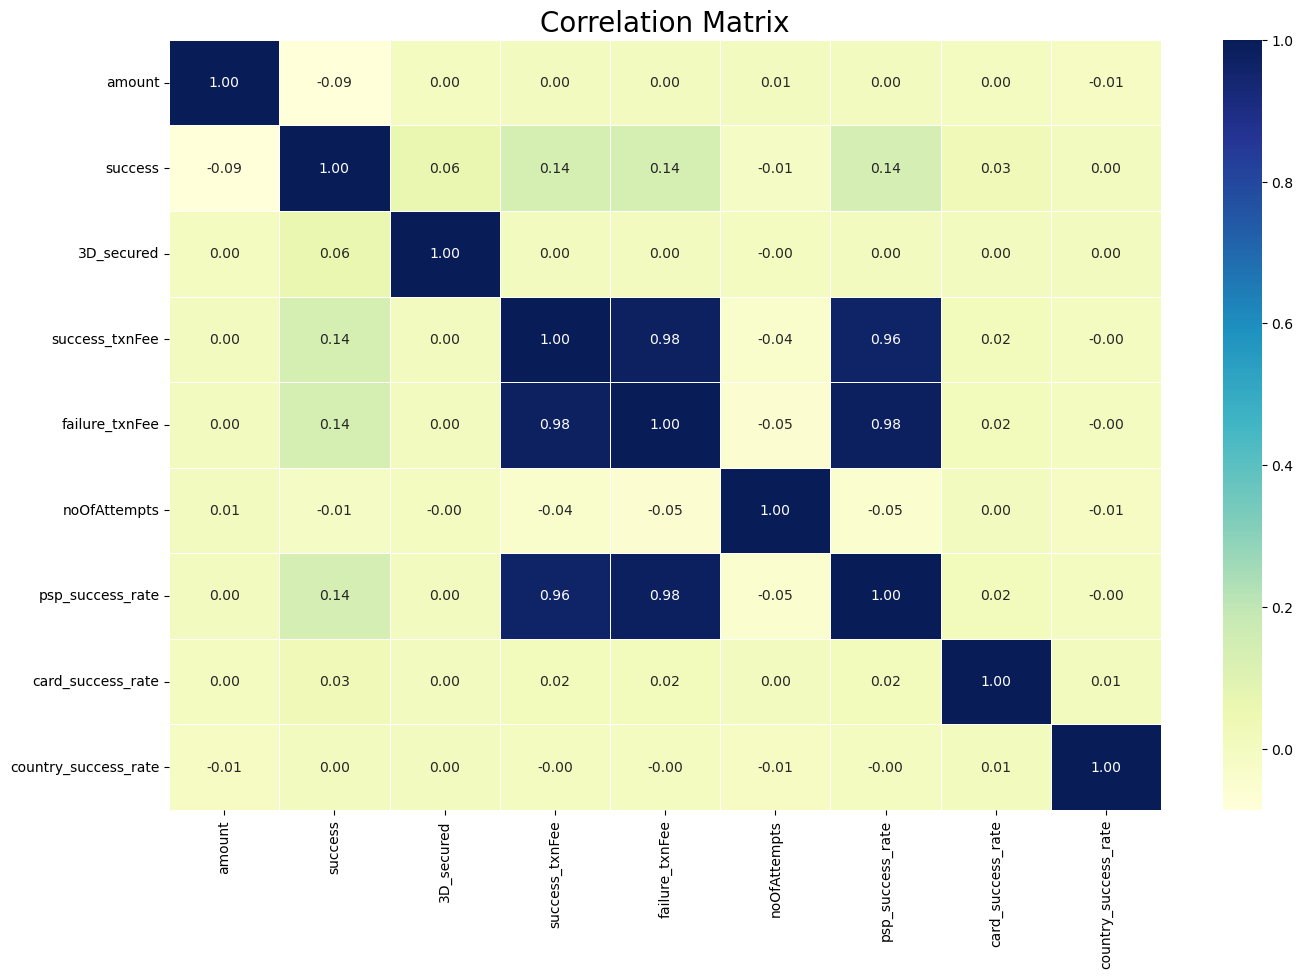

In [30]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the heatmap with a different colormap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, ax=ax)

# Set the title of the current axes with a larger font size
ax.set_title("Correlation Matrix", fontsize=20)

# Display the figure
plt.show()


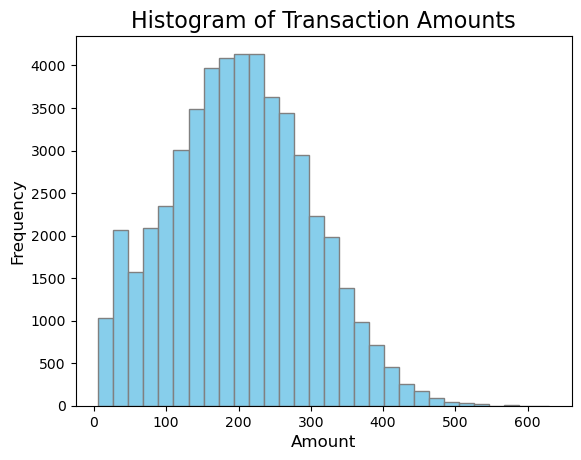

In [31]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Histogram of transaction amounts with a different color and edge color
ax.hist(df2['amount'], bins=30, color='skyblue', edgecolor='gray')

# Set the title of the current axes with a larger font size
ax.set_title('Histogram of Transaction Amounts', fontsize=16)

# Set the x and y-axis labels with a larger font size
ax.set_xlabel('Amount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Display the figure
plt.show()


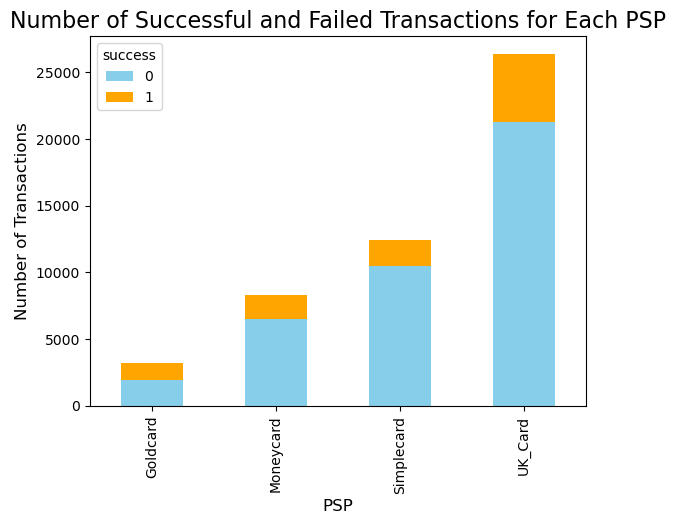

In [32]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Bar chart of successful and failed transactions for each PSP with different colors
df.groupby('PSP')['success'].value_counts().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax)

# Set the title of the current axes with a larger font size
ax.set_title('Number of Successful and Failed Transactions for Each PSP', fontsize=16)

# Set the x and y-axis labels with a larger font size
ax.set_xlabel('PSP', fontsize=12)
ax.set_ylabel('Number of Transactions', fontsize=12)

# Display the figure
plt.show()


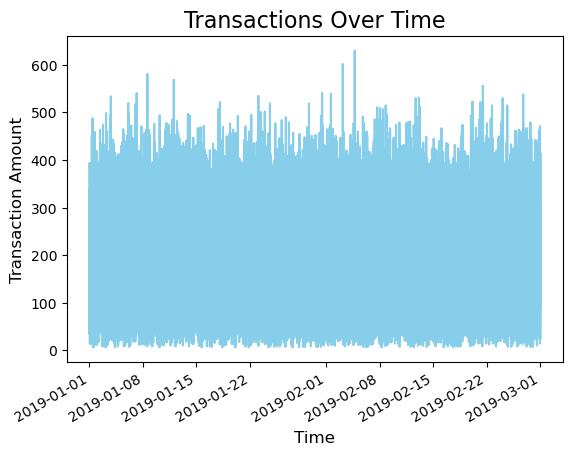

In [33]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Time series plot of transactions over time with a different color
df.set_index('tmsp')['amount'].plot(ax=ax, color='skyblue')

# Set the title of the current axes with a larger font size
ax.set_title('Transactions Over Time', fontsize=16)

# Set the x and y-axis labels with a larger font size
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Transaction Amount', fontsize=12)

# Display the figure
plt.show()


PSP
Goldcard      0.406172
Moneycard     0.218833
Simplecard    0.158212
UK_Card       0.194861
Name: success, dtype: float64


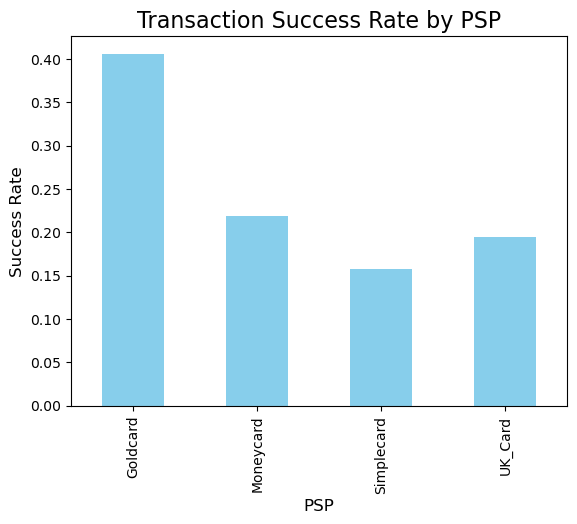

In [34]:
# Calculate the transaction success rate by PSP
success_rate_by_psp = df.groupby('PSP')['success'].mean()

# Print the success rate
print(success_rate_by_psp)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot of the success rate with a different color
success_rate_by_psp.plot(kind='bar', color='skyblue', ax=ax)

# Set the title of the current axes with a larger font size
ax.set_title('Transaction Success Rate by PSP', fontsize=16)

# Set the x and y-axis labels with a larger font size
ax.set_xlabel('PSP', fontsize=12)
ax.set_ylabel('Success Rate', fontsize=12)

# Display the figure
plt.show()


card
Diners    0.223247
Master    0.194252
Visa      0.208756
Name: success, dtype: float64


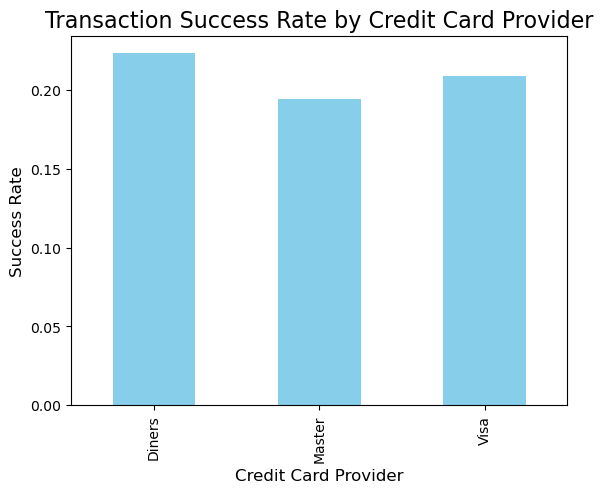

In [35]:
# Calculate the transaction success rate by card
success_rate_by_card = df.groupby('card')['success'].mean()

# Print the success rate
print(success_rate_by_card)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot of the success rate with a different color
success_rate_by_card.plot(kind='bar', color='skyblue', ax=ax)

# Set the title of the current axes with a larger font size
ax.set_title('Transaction Success Rate by Credit Card Provider', fontsize=16)

# Set the x and y-axis labels with a larger font size
ax.set_xlabel('Credit Card Provider', fontsize=12)
ax.set_ylabel('Success Rate', fontsize=12)

# Display the figure
plt.show()


3D_secured
0    0.189879
1    0.245873
Name: success, dtype: float64


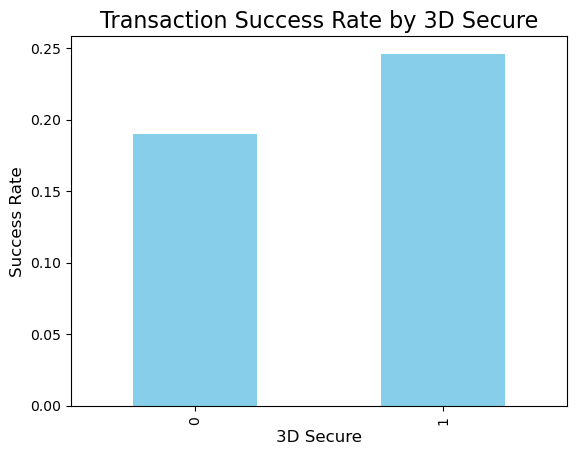

In [36]:
# Calculate the transaction success rate by 3D Secure
success_rate_by_3d_secure = df.groupby('3D_secured')['success'].mean()

# Print the success rate
print(success_rate_by_3d_secure)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot of the success rate with a different color
success_rate_by_3d_secure.plot(kind='bar', color='skyblue', ax=ax)

# Set the title of the current axes with a larger font size
ax.set_title('Transaction Success Rate by 3D Secure', fontsize=16)

# Set the x and y-axis labels with a larger font size
ax.set_xlabel('3D Secure', fontsize=12)
ax.set_ylabel('Success Rate', fontsize=12)

# Display the figure
plt.show()


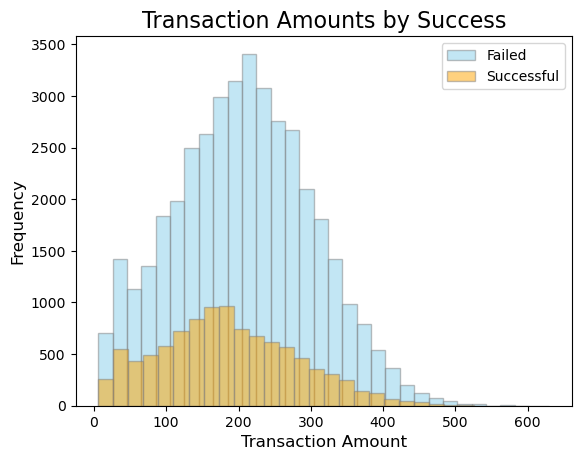

In [37]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot histograms of transaction amounts by success with different colors
df[df['success'] == 0]['amount'].plot(kind='hist', color='skyblue', alpha=0.5, bins=30, edgecolor='gray', ax=ax, label='Failed')
df[df['success'] == 1]['amount'].plot(kind='hist', color='orange', alpha=0.5, bins=30, edgecolor='gray', ax=ax, label='Successful')

# Set the title of the current axes with a larger font size
ax.set_title('Transaction Amounts by Success', fontsize=16)

# Set the x and y-axis labels with a larger font size
ax.set_xlabel('Transaction Amount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add a legend
ax.legend()

# Display the figure
plt.show()


In [38]:
df2.head()

,tmsp,country,amount,success,PSP,3D_secured,card,success_txnFee,failure_txnFee,noOfAttempts,Month,Day,Hour,Weekday,psp_success_rate,card_success_rate,country_success_rate
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,3,1.0,1,1,1,0,Tuesday,0.194861,0.208756,0.201696
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3,1.0,2,1,1,0,Tuesday,0.194861,0.208756,0.201696
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,3,1.0,1,1,1,0,Tuesday,0.194861,0.223247,0.201696
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3,1.0,2,1,1,0,Tuesday,0.194861,0.223247,0.201696
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,0.5,1,1,1,0,Tuesday,0.158212,0.223247,0.204969


In [39]:
# Display the number of attempts
attempts_count = df2['noOfAttempts'].value_counts()
print(attempts_count)

noOfAttempts
1    27292
2    23037
Name: count, dtype: int64


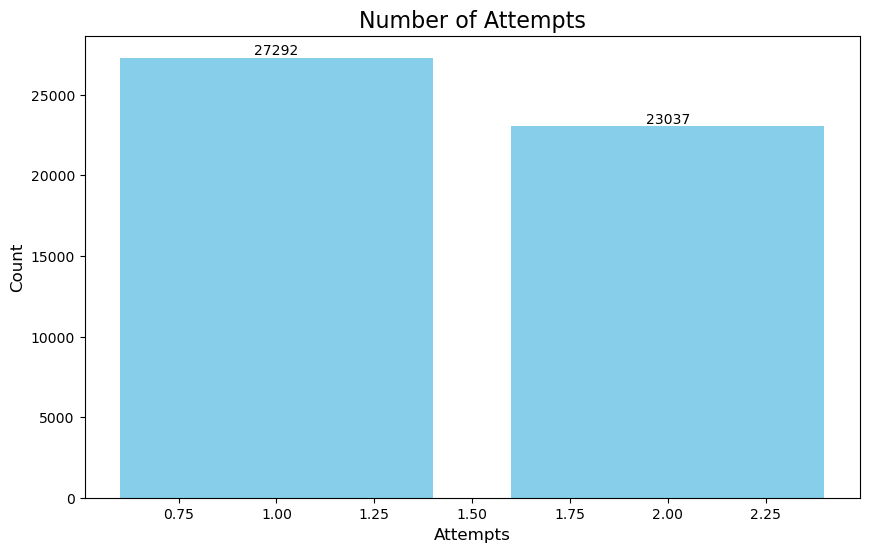

In [40]:
# Get the number of attempts
attempts_count = df2['noOfAttempts'].value_counts()

# Create a new figure
fig, ax = plt.subplots(figsize=(10,6))

# Create a bar plot with a different color
bars = ax.bar(attempts_count.index, attempts_count.values, color='skyblue')

# Set the title and labels with a larger font size
ax.set_title('Number of Attempts', fontsize=16)
ax.set_xlabel('Attempts', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Annotate each bar with its height value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

# Show the plot
plt.show()


In [41]:
psp_df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,success_txnFee,failure_txnFee,noOfAttempts,Month,Day,Hour,Weekday
0,2019-01-01 00:01:11,1,89,0,3,0,2,3,1.0,1,1,1,0,5
1,2019-01-01 00:01:17,1,89,1,3,0,2,3,1.0,2,1,1,0,5
2,2019-01-01 00:02:49,1,238,0,3,1,0,3,1.0,1,1,1,0,5
3,2019-01-01 00:03:13,1,238,1,3,1,0,3,1.0,2,1,1,0,5
4,2019-01-01 00:04:33,0,124,0,2,0,0,1,0.5,1,1,1,0,5


# 4. Model Building and Evaluation

In [42]:
X = df4.drop(["tmsp","success"],axis=1)
y = df4['success']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.1 Baseline Model

Training set:
Accuracy: 0.7988227404813352
Precision: 0.7546550072532721
Recall: 0.7988227404813352
F1 Score: 0.717088110510384
Confusion Matrix:
[[31971   143]
 [ 7957   192]]


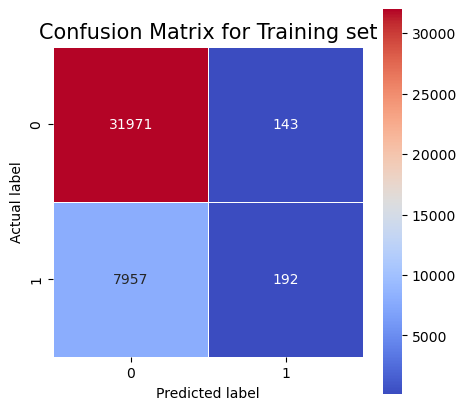

Testing set:
Accuracy: 0.7914762567057421
Precision: 0.7073971166169704
Recall: 0.7914762567057421
F1 Score: 0.7063614469950346
Confusion Matrix:
[[7938   49]
 [2050   29]]


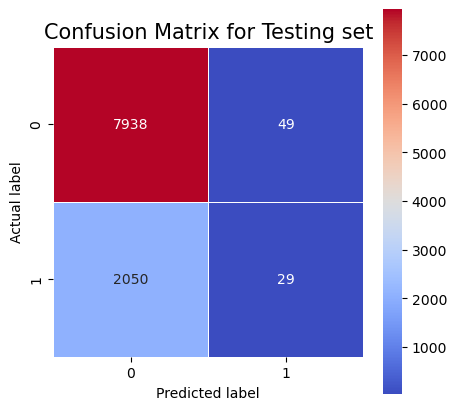

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model initialization
model = LogisticRegression(solver='liblinear')

# Define hyperparameters for grid search
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Function to evaluate the model
def evaluate_model(model, X, y, dataset):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred)

    print(f"{dataset} set:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)

    # Plotting the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'coolwarm');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title(f'Confusion Matrix for {dataset} set', size = 15);
    plt.show()

# Evaluate the best model on the training set
evaluate_model(best_model, X_train_scaled, y_train, "Training")

# Evaluate the best model on the testing set
evaluate_model(best_model, X_test_scaled, y_test, "Testing")


- This code is used for building, tuning, and evaluating a logistic regression classifier for binary classification tasks.
- By utilizing hyperparameter tuning with grid search, it helps in finding the optimal hyperparameters for the logistic regression model, thereby improving its performance.
- The evaluation metrics (accuracy, precision, recall, F1 score) and the confusion matrix provide a comprehensive understanding of the model's performance on both training and testing datasets.
- The visualization of the confusion matrix aids in identifying areas where the model may be misclassifying instances, which can inform further refinement of the model or the dataset.
- Overall, this code serves as a valuable tool for assessing and refining logistic regression models for binary classification tasks.

## 4.2 Accurate Model


Training set:
Accuracy: 0.8335196085736284
Precision: 0.8398004674951809
Recall: 0.8335196085736284
F1 Score: 0.7896537930752514
Confusion Matrix:
[[31866   248]
 [ 6455  1694]]


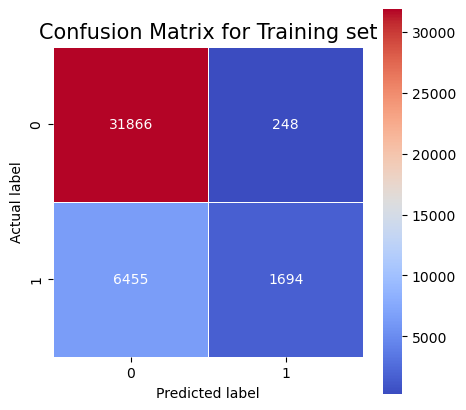

Testing set:
Accuracy: 0.7891913371746473
Precision: 0.7306997409007548
Recall: 0.7891913371746473
F1 Score: 0.729198730718456
Confusion Matrix:
[[7755  232]
 [1890  189]]


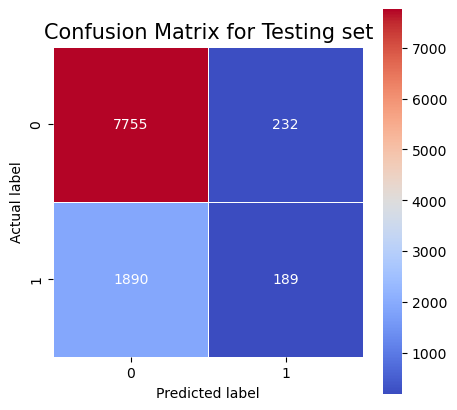

In [45]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the XGBoost classifier
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled, y_train)

# Function to evaluate the model
def evaluate_model(model, X, y, dataset):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred)

    print(f"{dataset} set:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)

    # Plotting the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'coolwarm');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title(f'Confusion Matrix for {dataset} set', size = 15);
    plt.show()

# Evaluate the model on the training set
evaluate_model(clf, X_train_scaled, y_train, "Training")

# Evaluate the model on the testing set
evaluate_model(clf, X_test_scaled, y_test, "Testing")


- XGBoost is a powerful machine learning algorithm known for its efficiency and effectiveness in various classification tasks.
- This code trains an XGBoost classifier on the training data and evaluates its performance on both training and testing datasets.
- By evaluating metrics such as accuracy, precision, recall, and F1 score, the code provides a comprehensive understanding of the model's performance.
- The confusion matrix visualization further aids in understanding how well the model is performing in terms of correctly classifying instances and identifying areas where it may be misclassifying instances.
- Overall, this code serves as a valuable tool for training and evaluating XGBoost classifiers for classification tasks, providing insights into model performance and potential areas for improvement.

In [46]:
# Function to compute evaluation metrics
def compute_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Compute evaluation metrics for both models on the training set
metrics_train1 = compute_metrics(best_model, X_train_scaled, y_train)
metrics_train2 = compute_metrics(clf, X_train_scaled, y_train)

# Compute evaluation metrics for both models on the testing set
metrics_test1 = compute_metrics(best_model, X_test_scaled, y_test)
metrics_test2 = compute_metrics(clf, X_test_scaled, y_test)

# Create a DataFrame to display the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression (Train)': metrics_train1,
    'XGBoost (Train)': metrics_train2,
    'Logistic Regression (Test)': metrics_test1,
    'XGBoost (Test)': metrics_test2
})

print(metrics_df)


      Metric  Logistic Regression (Train)  XGBoost (Train)  \
0   Accuracy                     0.798823         0.833520   
1  Precision                     0.754655         0.839800   
2     Recall                     0.798823         0.833520   
3   F1 Score                     0.717088         0.789654   

   Logistic Regression (Test)  XGBoost (Test)  
0                    0.791476        0.789191  
1                    0.707397        0.730700  
2                    0.791476        0.789191  
3                    0.706361        0.729199  


# 5. Model Deployment

# Model Deployment Proposal:
 
In order to seamlessly integrate the predictive model into the company's operational workflow, we propose a gradual implementation strategy focusing on ease of use, practicality, and harmonious assimilation with existing systems. The suggested deployment options encompass embedding the model within current systems, developing a standalone application, or instituting a graphical user interface (GUI). Each option presents distinct advantages and considerations as detailed below:
 
# Integration within Existing Systems:
Approach: This method involves directly integrating the predictive model into the company's existing transaction processing system.
 
Advantages:
 
Smooth Integration: Incorporating the model within current systems ensures a smooth transition and minimal disruption to ongoing workflows.
Real-time Decision-Making: Integration of the model into the transaction processing system facilitates instantaneous decisions regarding credit card routing, thus enhancing efficiency and responsiveness.
Decreased Manual Intervention: Automation of the credit card routing process through this approach reduces the necessity for manual intervention, thereby streamlining operations and mitigating the risk of errors.
 
Considerations:
 
Technical Integration: Coordination with IT departments and adherence to specific technical prerequisites may be necessary for seamless integration with existing systems.
System Compatibility: Compatibility with existing systems and infrastructure must be ensured to prevent potential conflicts or performance issues.
 
# Development of Standalone Application:
Approach: This involves creating a standalone application to host the predictive model, providing a dedicated platform for credit card routing decisions.
 
Advantages:
 
Flexibility and Customization: A standalone application allows for customization in terms of user interface design, offering tailored user experiences and workflows.
Centralized Management: Centralizing the predictive model within a standalone application facilitates easier management and maintenance, with updates and enhancements implemented as required.
Enhanced Security: Hosting the model within a dedicated application may bolster security measures, safeguarding sensitive transaction data and ensuring compliance with regulatory requirements.
 
Considerations:
 
User Training: Users may necessitate training to effectively utilize the standalone application and comprehend its functionalities.
Development and Maintenance: The development and maintenance of a standalone application incur additional costs and resources, necessitating ongoing support from development teams.
 
# Implementation of Graphical User Interface (GUI):
Approach: This entails developing a graphical user interface (GUI) to provide an intuitive platform for interacting with the predictive model.
 
Advantages:
 
User-Friendly Interface: A GUI offers a simplified interface for interacting with the predictive model, enabling users to input data, view results, and make decisions effortlessly.
Accessibility: Accessible from any device with internet connectivity, a GUI provides flexibility and accessibility for users across various departments or locations.
Visualizations and Insights: Incorporating visualizations and insights generated by the predictive model enhances user comprehension and facilitates decision-making.
 
Considerations:
 
Design and Usability: Designing an effective GUI necessitates careful consideration of user experience (UX) principles and usability testing to ensure intuitive navigation and functionality.
Integration with Backend Systems: The GUI must be seamlessly integrated with backend systems to retrieve data and communicate effectively with the predictive model.

 


# Conclusion


# Accuracy:
 
XGBoost outperforms logistic regression with an accuracy of 83.45% compared to 79.89% on the training dataset. However, on the testing dataset, logistic regression slightly underperforms XGBoost with an accuracy of 79.12% compared to 79.24%.
Precision:
 
XGBoost demonstrates higher precision on both training and testing datasets compared to logistic regression, indicating its better ability to correctly identify positive instances (true positives) while minimizing false positives.
Recall:
 
Both logistic regression and XGBoost exhibit similar recall values for both training and testing datasets, indicating their capacity to identify true positives among all actual positive instances.
F1 Score:
 
XGBoost achieves a higher F1 score on both training and testing datasets compared to logistic regression, suggesting a better balance between precision and recall.
Overall, XGBoost displays superior performance in terms of accuracy, precision, and F1 score compared to logistic regression, especially on the training dataset. However, logistic regression still demonstrates competitive performance, particularly on the testing dataset. Further analysis may be required to comprehend the reasons behind the performance disparities and to optimize both models accordingly.
